# Tests of "reduced" or "approximated" CO5BOLD-data

- arief_st28gm06n052_ellipsoids/filled-mean-ellipsoids_st28gm06n052-032.pickle

Ellipsoids with only average data throughout

- arief_st28gm06n052_ellipsoids/filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle

Ellipsoids with 1/r^2 dependant 

## My method:

- Load R3D-grid-file (csv with R, X, Y, Z coords of all R3D-cells)

- Create an empty list corresponding to e.g. dust_density.inp

- Loop through each ellipsoid's cell coordinates

- Compare with R3D-coordinates

- Save densities at appropiate positions in the dust_density.inp-list





In [ ]:
#I have now uploaded two pickle files on the phy-exwings server, located in: 
# /home/ariah/dat/caucus (sidenote: caucus stands for ChAracterising dUst CloUdS hahaha):

#    filled-mean-ellipsoids_st28gm06n052-032.pickle – ellipsoids filled in with 
#    mean values (i.e. uniform distribution)
#    filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle – ellipsoids 
#    filled in with an inverse radial distribution (e.g. gas density higher 
#    further away from the star)

 
# These are for the snapshot 032 of the model st28gm06n052. I restructured the data 
# format following your suggestion yesterday, about separating each ellipsoids into
# different arrays rather than having one big [679^3] domain – which saved a lot of
# space! Now the data is mostly in a list of arrays. You can load the pickle files
# as follows:

###

import pickle

with open('[INSERTDIRECTORY]/filled-mean-ellipsoids_lists.pickle', 'rb') as handle:
    b = pickle.load(handle)

###

# where you would have loaded a dictionary with the keys:

#    'centre_ellipsoid' (2D array): indices of the centre of the ellipsoids [X,Y,Z]
#    'distance_centre_grid' (1D array): distance from of the centre of the ellipsoids 
#       to the star (in cm)
#    'coord_list' (list of arrays): each element in the list is an array of the 
#       relevant indices for the eliipsoids
#    'coord_d_list' (list of arrays): each element in the list is an array of the 
#       distances from the star [X,Y,Z] (in cm)
#    'filled_rho' (list of arrays): each element in the list is an array for the 
#       values of the gas density in each coordinate
#    'filled_temp' (list of arrays): each element in the list is an array for the
#       values of the temperature in each coordinate
#    'filled_quc' (list of arrays): each element in the list is an array for the
#       values of the condensation fraction in each coordinate
#    'filled_nmonomer’ (list of arrays): each element in the list is an array for 
#       the values of the number of monomers in each coordinate

 
# There are a total of 22 ellipsoids in this snapshot. If you would like the data
# above in the format of the whole [679^3] domain, I have a small function which
# can do this -- please refer to function attached. If things are confusing then
# please let me know, we can look through the data together sometime today or
# whenever you get to this! Thank you :- )

In [5]:
# Load
import pickle
import numpy as np
import matplotlib.pyplot as plt
AUcm = 1.49598e13 # AU in cm cm


path = '../co5bold_data/st28gm06n052_arief_tests/filled-mean-ellipsoids_st28gm06n052-032.pickle'

with open(path, 'rb') as f:
    ellipsoid_dict = pickle.load(f)

# Quick plots here
# Translate to r3d-inp-files





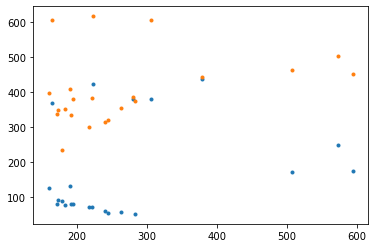

In [7]:
# Quick check of coordinates of centre of ellipsoids

print(ellipsoid_dict['centre_ellipsoid'])

# X and Y
plt.plot(
    ellipsoid_dict['centre_ellipsoid'][:,0],
    ellipsoid_dict['centre_ellipsoid'][:,1],
    '.'
)

# X and Z
plt.plot(
    ellipsoid_dict['centre_ellipsoid'][:,0],
    ellipsoid_dict['centre_ellipsoid'][:,2],
    '.'
)



In [9]:
#    'distance_centre_grid' (1D array): distance from of the centre of the ellipsoids 
#       to the star (in cm)
cloud_r_au = ellipsoid_dict['distance_centre_grid']/AUcm


array([3.77323325, 8.05164903, 8.98206196, 8.84119063, 9.33045007,
       8.23908622, 8.11251765, 8.13898043, 7.690482  , 6.92586774,
       8.82885578, 7.4305455 , 8.46003786, 8.61583901, 7.78322494,
       7.40704681, 8.17899951, 9.1437802 , 7.93717229, 8.198699  ,
       2.25307802, 6.89328836])

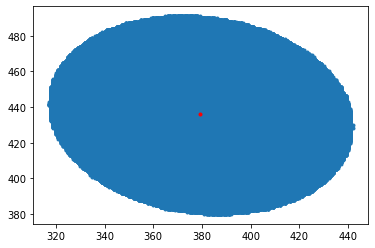

In [15]:
#    'coord_list' (list of arrays): each element in the list is an array of the 
#       relevant indices for the eliipsoids

# Plot XY-cell numbers in 
plt.plot(
    ellipsoid_dict['coord_list'][0][:,0],
    ellipsoid_dict['coord_list'][0][:,1],
    '.'
)

# And a red dot for centre cell
plt.plot(
    ellipsoid_dict['centre_ellipsoid'][0,0],
    ellipsoid_dict['centre_ellipsoid'][0,1],
    'r.'
)



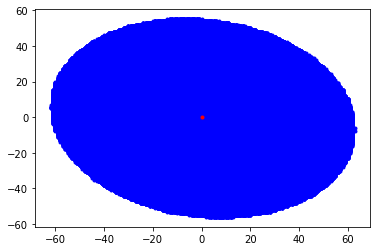

In [29]:
# Plot XY-cell numbers renomalised to zero? in 
plt.plot(
    ellipsoid_dict['coord_list'][0][:,0] - ellipsoid_dict['centre_ellipsoid'][0,0],
    ellipsoid_dict['coord_list'][0][:,1] - ellipsoid_dict['centre_ellipsoid'][0,1],
    'b.'
)

# And a red dot for centre cell
plt.plot(0,0,'r.'
)


(561184, 3)


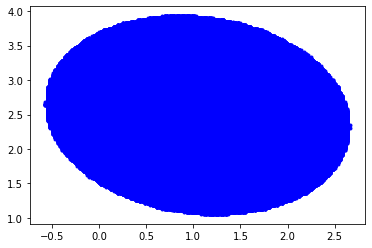

In [91]:
#    'coord_d_list' (list of arrays): each element in the list is an array of the 
#       distances from the star [X,Y,Z] (in cm)


cloud01_coords = ellipsoid_dict['coord_d_list'][0]/AUcm

# Plot cloud 0's x-y coords in AU
plt.plot(
    cloud01_coords[:,0],
    cloud01_coords[:,1],
    'b.'
)
print(cloud01_coords.shape)

(561184,)


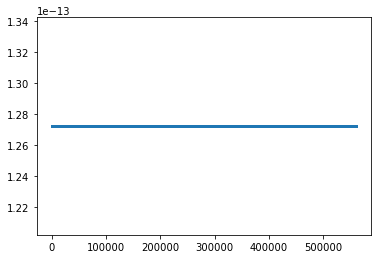

In [73]:
#    'filled_rho' (list of arrays): each element in the list is an array for the 
#       values of the gas density in each coordinate
plt.plot(ellipsoid_dict['filled_rho'][0],'.',markersize=1)
print(ellipsoid_dict['filled_rho'][0].shape)


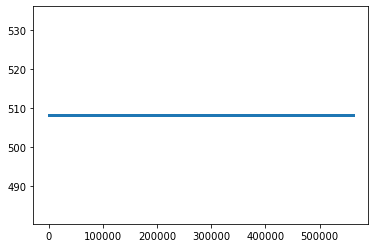

In [74]:
#    'filled_temp' (list of arrays): each element in the list is an array for the
#       values of the temperature in each coordinate
plt.plot(ellipsoid_dict['filled_temp'][0],'.',markersize=1)


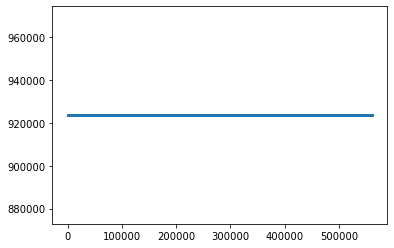

In [75]:
#    'filled_quc' (list of arrays): each element in the list is an array for the
#       values of the condensation fraction in each coordinate
plt.plot(ellipsoid_dict['filled_quc'][0],'.',markersize=1)


In [89]:
print(ellipsoid_dict['filled_nmonomer'][0].shape)
print(cloud01_coords.shape)

(561184,)
(561184, 3)


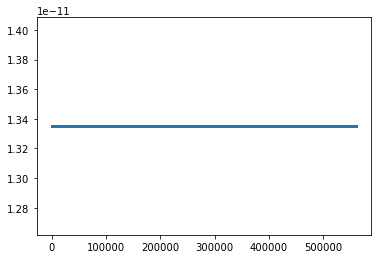

In [78]:
#    'filled_nmonomer’ (list of arrays): each element in the list is an array for 
#       the values of the number of monomers in each coordinate
plt.plot(ellipsoid_dict['filled_nmonomer'][0]*2.3362e-22,'.',markersize=1)


[0.02585142 0.05170284 0.10340568 0.10340568 0.10340568 0.10340568
 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568
 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568
 0.10340568 0.10340568 0.10340568 0.10340568]


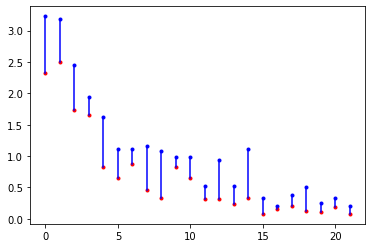

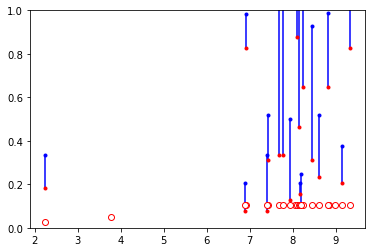

In [39]:

# Distance to ellispoids
cloud_r_au = ellipsoid_dict['distance_centre_grid']/AUcm
Ncloud = cloud_r_au.size


cloud_sizes = np.zeros(Ncloud)
cloud_sizes_minor = np.zeros(Ncloud)
cell_sizes = np.zeros(Ncloud)

for ncloud in range(Ncloud):

    # Size of ellipsoids
    cloud_sizes[ncloud] = np.array([
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].min()))/AUcm
    ]).max()

    cloud_sizes_minor[ncloud] = np.array([
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].min()))/AUcm
    ]).min()


    # Cell size at centre of cloud
    cell_sizes[ncloud] = 0.4136227230610557
    if cloud_r_au[ncloud] <= 13.203518763619835:
        cell_sizes[ncloud] = 0.20681136153052784
    if cloud_r_au[ncloud] <= 9.902639072714877:
        cell_sizes[ncloud] = 0.10340568076526392
    if cloud_r_au[ncloud] <= 6.601759381809917:
        cell_sizes[ncloud] = 0.05170284038263196
    if cloud_r_au[ncloud] <= 3.3008796909049587:
        cell_sizes[ncloud] = 0.02585142019131598



# Plot cloud size vs cloud "number"
plt.figure(1)
plt.plot(cloud_sizes,'b.')
plt.plot(cloud_sizes_minor,'r.')
for ncloud in range(Ncloud):
    plt.plot(
        [np.linspace(0,Ncloud-1,Ncloud)[ncloud],np.linspace(0,Ncloud-1,Ncloud)[ncloud]],
        [cloud_sizes[ncloud],cloud_sizes_minor[ncloud]],'b-'
    )


# Plot cloud size vs radial distance to centre, and grid cell size
plt.figure(2)
for ncloud in range(Ncloud):
    plt.plot(
        [cloud_r_au[ncloud],cloud_r_au[ncloud]],
        [cloud_sizes[ncloud],cloud_sizes_minor[ncloud]],'b-'
    )
plt.plot(cloud_r_au,cloud_sizes,'b.')
plt.plot(cloud_r_au,cloud_sizes_minor,'r.')
plt.plot(cloud_r_au,cell_sizes,'ro',markerfacecolor = 'w')
plt.ylim(0,1)
print(np.sort(cell_sizes))





## Test to create dust_density.inp

and other files

In [28]:
# Load an r3d-grid
import analyze_r3d_functions as a3d

griddistances = a3d.load_griddistances(
    gridpath = '../r3dresults/st28gm06n052_arief_tests/grid_distances.csv',
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
)
cellsizes = a3d.load_cellsizes(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
    sizepath = '../r3dresults/st28gm06n052_arief_tests/grid_cellsizes.csv',
)
nleafs = a3d.load_grid_properties(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp'
)[2]



In [1]:
for nn in range(22-2,22):
    print(nn)

20
21


In [1]:
# Loop through coords of one of the ellipsoids and save in the r3d-grid
# In cm
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d


AUcm = 1.49598e13 # AU in cm cm
monomermass = 2.3362e-22 # Forsterite mass in g


print('Load data')

# Load Ariefs pickles
path = '../../exwings_archivedata/co5bold_data/st28gm06n052_arief_tests/filled-mean-ellipsoids_st28gm06n052-032.pickle'
with open(path, 'rb') as f:
    ellipsoid_dict = pickle.load(f)


# Load an r3d-grid
griddistances = a3d.load_griddistances(
    gridpath = '../r3dresults/st28gm06n052_arief_tests/grid_distances.csv',
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
)
cellsizes = a3d.load_cellsizes(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
    sizepath = '../r3dresults/st28gm06n052_arief_tests/grid_cellsizes.csv',
)
nleafs = a3d.load_grid_properties(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp'
)[2]

# Declare arrays
# This was faster than looping through whole grid, writing zeros, again and again
r3d_densities = np.zeros(nleafs)
r3d_temperatures = np.zeros(nleafs)
r3d_condenfrac = np.zeros(nleafs)
r3d_mincellsize = cellsizes.min()


# Should loop over each ellipsoid here
Nellipsoids = ellipsoid_dict['distance_centre_grid'].size
print(f'There are {Nellipsoids} dust clouds:')




# Extract all c5d coords to the same lists
cloud_coordsX = []
cloud_coordsY = []
cloud_coordsZ = []

cloud_densities = []
# and cloud temperatures etc

# Loop through each cloud and append to these lists
for nellipsoid in range(Nellipsoids):

    Nc5d = ellipsoid_dict['coord_d_list'][nellipsoid][:,0].size
    print(f'  Cloud {nellipsoid+1} has {Nc5d} c5d-cells.')

    for nc5d in range(Nc5d):
        cloud_coordsX.append(ellipsoid_dict['coord_d_list'][nellipsoid][nc5d,0])
        cloud_coordsY.append(ellipsoid_dict['coord_d_list'][nellipsoid][nc5d,1])
        cloud_coordsZ.append(ellipsoid_dict['coord_d_list'][nellipsoid][nc5d,2])

        cloud_densities.append(ellipsoid_dict['filled_nmonomer'][nellipsoid][nc5d])

# Change lists to np-arrays for simplicty later with argwhere and so on
cloud_coordsX = np.array(cloud_coordsX)
cloud_coordsY = np.array(cloud_coordsY)
cloud_coordsZ = np.array(cloud_coordsZ)

cloud_densities = np.array(cloud_densities)

# Then loop through r3d-grid and put these in the r3d-grid
progresscounter = 0
percentagecounter = 5


for nr3d in range(nleafs):


    if np.round(nr3d/nleafs*100) ==  1 and progresscounter == 0:
        print('     1 percent done.')
        progresscounter += 1
    if np.round(nr3d/nleafs*100) ==  5 and progresscounter == 1:
        print('     5 percent done.')
        progresscounter += 1
    if np.round(nr3d/nleafs*100) == 10 and progresscounter == 2:
        print('    10 percent done.')
        progresscounter += 1
    if np.round(nr3d/nleafs*100) == 15 and progresscounter == 3:
        print('    15 percent done.')
        progresscounter += 1
    if np.round(nr3d/nleafs*100) == 20 and progresscounter == 4:
        print('    20 percent done.')
        progresscounter += 1
    if np.round(nr3d/nleafs*100) == 25 and progresscounter == 5:
        print('    25 percent done.')
        progresscounter += 1
    if np.round(nr3d/nleafs*100) == 50 and progresscounter == 6:
        print('    50 percent done.')
        progresscounter += 1
    if np.round(nr3d/nleafs*100) == 75 and progresscounter == 7:
        print('    75 percent done.')
        progresscounter += 1


    # Extract size range for current r3dcell
    r3dxrange = [
        griddistances[nr3d,1]-0.5*cellsizes[nr3d],
        griddistances[nr3d,1]+0.5*cellsizes[nr3d]
    ]
    r3dyrange = [
        griddistances[nr3d,2]-0.5*cellsizes[nr3d],
        griddistances[nr3d,2]+0.5*cellsizes[nr3d]
    ]
    r3dzrange = [
        griddistances[nr3d,3]-0.5*cellsizes[nr3d],
        griddistances[nr3d,3]+0.5*cellsizes[nr3d]
    ]       

    # Extract indeces of all c5dcells within current r3dcell
    c5dindeces = np.argwhere(
        (cloud_coordsX >= r3dxrange[0]) & (cloud_coordsX <= r3dxrange[1]) & \
        (cloud_coordsY >= r3dyrange[0]) & (cloud_coordsY <= r3dyrange[1]) & \
        (cloud_coordsZ >= r3dzrange[0]) & (cloud_coordsZ <= r3dzrange[1])
    )

    # Take average density of all densities in these cells
    if c5dindeces.size > 0:
        print(f'Number of c5d-cells in r3d-cell {nr3d}: {c5dindeces}')

        r3d_densities[nr3d] = cloud_densities[c5dindeces].mean() * monomermass
        #r3d_temperatures[nr3d] = cloud_temperatures[c5dindeces].mean()
        #r3d_condenfrac[nr3d] = cloud_condenfrac[c5dindeces].mean()
 


# Write density file
print('prints densities')

with open(f'../dust_density_arief032.inp', 'w') as fdensity:

    # Write headers:
    #
    # Density:
    # 1
    # nleafs
    # number dust species
    fdensity.write(f'1\n{int(nleafs)}\n1\n')

    for density in r3d_densities:
        fdensity.write(f'{density}\n')

# Takes 15min 18s (for first cloud)
# 18 for all?


Load data
There are 22 dust clouds:
  Cloud 1 has 561184 c5d-cells.
  Cloud 2 has 234647 c5d-cells.
  Cloud 3 has 81480 c5d-cells.
  Cloud 4 has 53787 c5d-cells.
  Cloud 5 has 13482 c5d-cells.
  Cloud 6 has 5918 c5d-cells.
  Cloud 7 has 6064 c5d-cells.
  Cloud 8 has 4172 c5d-cells.
  Cloud 9 has 2289 c5d-cells.
  Cloud 10 has 5646 c5d-cells.
  Cloud 11 has 2026 c5d-cells.
  Cloud 12 has 914 c5d-cells.
  Cloud 13 has 1318 c5d-cells.
  Cloud 14 has 456 c5d-cells.
  Cloud 15 has 1121 c5d-cells.
  Cloud 16 has 98 c5d-cells.
  Cloud 17 has 116 c5d-cells.
  Cloud 18 has 187 c5d-cells.
  Cloud 19 has 282 c5d-cells.
  Cloud 20 has 132 c5d-cells.
  Cloud 21 has 251 c5d-cells.
  Cloud 22 has 109 c5d-cells.
     1 percent done.


In [40]:
cloud_coordsX = []
cloud_coordsY = []
cloud_coordsZ = []

cloud_densities = []

for nellipsoid in range(Nellipsoids):

    Nc5d = ellipsoid_dict['coord_d_list'][nellipsoid][:,0].size
    print(f'  Cloud {nellipsoid+1} has {Nc5d} c5d-cells.')

    for nc5d in range(Nc5d):
        cloud_coordsX.append(ellipsoid_dict['coord_d_list'][nellipsoid][nc5d,0])
        cloud_coordsY.append(ellipsoid_dict['coord_d_list'][nellipsoid][nc5d,1])
        cloud_coordsZ.append(ellipsoid_dict['coord_d_list'][nellipsoid][nc5d,2])


        cloud_densities.append(ellipsoid_dict['filled_nmonomer'][nellipsoid][nc5d])
cloud_coordsX = np.array(cloud_coordsX)
cloud_coordsY = np.array(cloud_coordsY)
cloud_coordsZ = np.array(cloud_coordsZ)

cloud_coords = np.zeros((len(cloud_coordsX),3))
cloud_coords[:,0] = cloud_coordsX
cloud_coords[:,1] = cloud_coordsY
cloud_coords[:,2] = cloud_coordsZ


  Cloud 1 has 561184 cells.
  Cloud 2 has 234647 cells.
  Cloud 3 has 81480 cells.
  Cloud 4 has 53787 cells.
  Cloud 5 has 13482 cells.
  Cloud 6 has 5918 cells.
  Cloud 7 has 6064 cells.
  Cloud 8 has 4172 cells.
  Cloud 9 has 2289 cells.
  Cloud 10 has 5646 cells.
  Cloud 11 has 2026 cells.
  Cloud 12 has 914 cells.
  Cloud 13 has 1318 cells.
  Cloud 14 has 456 cells.
  Cloud 15 has 1121 cells.
  Cloud 16 has 98 cells.
  Cloud 17 has 116 cells.
  Cloud 18 has 187 cells.
  Cloud 19 has 282 cells.
  Cloud 20 has 132 cells.
  Cloud 21 has 251 cells.
  Cloud 22 has 109 cells.


In [6]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d


AUcm = 1.49598e13 # AU in cm cm
monomermass = 2.3362e-22 # Forsterite mass in g


print('Load data')

# Load Ariefs pickles
path = '../co5bold_data/st28gm06n052_arief_tests/filled-mean-ellipsoids_st28gm06n052-032.pickle'
with open(path, 'rb') as f:
    ellipsoid_dict = pickle.load(f)


# Load an r3d-grid
griddistances = a3d.load_griddistances(
    gridpath = '../r3dresults/st28gm06n052_arief_tests/grid_distances.csv',
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
)
cellsizes = a3d.load_cellsizes(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
    sizepath = '../r3dresults/st28gm06n052_arief_tests/grid_cellsizes.csv',
)
nleafs = a3d.load_grid_properties(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp'
)[2]


Load data


KeyboardInterrupt: 

There are 22 dust clouds:
561184
234647
81480
53787
13482
5918
6064
4172
2289
5646
2026
914
1318
456
1121
98
116
187
282
132
251
109


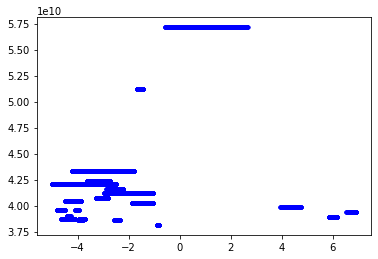

In [2]:

# Declare arrays
# This was faster than looping through whole grid, writing zeros, again and again
r3d_densities = np.zeros(nleafs)
r3d_temperatures = np.zeros(nleafs)
r3d_condenfrac = np.zeros(nleafs)
r3d_mincellsize = cellsizes.min()


# Should loop over each ellipsoid here
Nellipsoids = ellipsoid_dict['distance_centre_grid'].size
print(f'There are {Nellipsoids} dust clouds:')



# Extract all c5d coords to the same lists
cloud_coordsX = []
cloud_coordsY = []
cloud_coordsZ = []
cloud_densities = []

for nellipsoid in range(Nellipsoids):

    Nc5d = ellipsoid_dict['coord_d_list'][nellipsoid][:,0].size
    print(Nc5d)

    for nc5d in range(Nc5d):
        cloud_coordsX.append(ellipsoid_dict['coord_d_list'][nellipsoid][nc5d,0]/AUcm)
        cloud_coordsY.append(ellipsoid_dict['coord_d_list'][nellipsoid][nc5d,1]/AUcm)
        cloud_coordsZ.append(ellipsoid_dict['coord_d_list'][nellipsoid][nc5d,2]/AUcm)

        cloud_densities.append(ellipsoid_dict['filled_nmonomer'][nellipsoid][nc5d])


plt.plot(cloud_coordsX,cloud_densities,'b.')
